In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

C:\Users\eaesp\AppData\Local\Temp\ipykernel_19716\2057321895.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
conn = sqlite3.connect('tweets.db')
c = conn.cursor()

In [6]:
c.execute(""" SELECT x_coordinate, y_coordinate
          FROM coordinates
          WHERE twitter_user_id != 'null'
          and twitter_active_during_election = 'True'
""")
coordinates = c.fetchall()

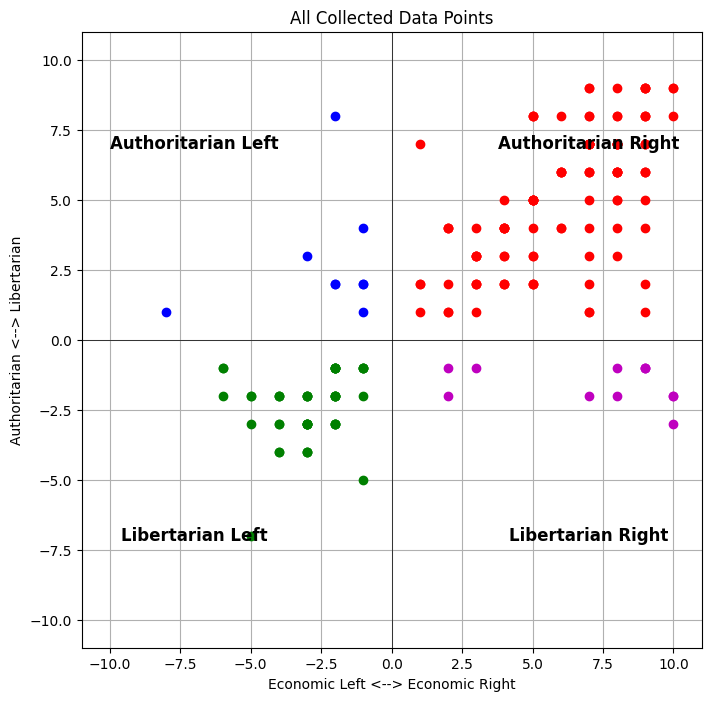

In [7]:
# Define political compass coordinates and colors for each quadrant
political_compass = {
    "Authoritarian Left": (-7, 7, 'blue'),
    "Authoritarian Right": (7, 7, 'red'),
    "Libertarian Left": (-7, -7, 'green'),
    "Libertarian Right": (7, -7, 'purple'),
}

# Plot political compass
plt.figure(figsize=(8, 8))
for ideology, (x, y, color) in political_compass.items():
    plt.text(x, y, ideology, ha='center', va='center', fontsize=12, color='black', fontweight='bold')

# Fetch coordinates from database
data = coordinates

# Plot coordinates from database with different colors based on quadrant
for x, y in data:
    if x < 0 and y > 0:
        plt.plot(x, y, 'bo')  # Blue for Authoritarian Left
    elif x > 0 and y > 0:
        plt.plot(x, y, 'ro')  # Red for Authoritarian Right
    elif x < 0 and y < 0:
        plt.plot(x, y, 'go')  # Green for Libertarian Left
    elif x > 0 and y < 0:
        plt.plot(x, y, 'mo')  # Purple for Libertarian Right

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-11, 11)  # Set x-axis limits
plt.ylim(-11, 11)  # Set y-axis limits
plt.title("All Collected Data Points", loc='center')
plt.xlabel("Economic Left <--> Economic Right")
plt.ylabel("Authoritarian <--> Libertarian")
plt.grid(True)
plt.show()


In [79]:
c.execute(""" SELECT t.*, c.x_coordinate, c.y_coordinate
              FROM tweets t
              JOIN coordinates c
              on t.user_id = c.twitter_user_id
""")
tweets = c.fetchall()

print(len(tweets))

1362
